# ¿Вспоминаем? pandas

[Документация](https://pandas.pydata.org/docs/)

In [5]:
import wget
import pandas as pd

In [7]:
wget.download('https://raw.githubusercontent.com/KatiaKozlova/files/main/57-10/pandas/restaurant_reviews.csv')

'restaurant_reviews.csv'

In [9]:
df = pd.read_csv('restaurant_reviews.csv')

### Посмотрим, как выглядит таблица:

In [30]:
df.sample(4)  # случайные строки

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
7806,Khaan Saab,Kalyan Madduru,"Khaan Saab, in Gachibowli was known for it's a...",4,"46 Reviews , 23 Followers",5/5/2019 22:43,3,NaN
5435,Asian Meal Box,Aditya Chopra,The rice is not well steamed and is hard. Did ...,3,"87 Reviews , 1165 Followers",1/19/2019 15:19,0,NaN
9915,Chinese Pavilion,Sravani Gade,Been to this place twice for dinner and haven'...,4,"1 Review , 49 Followers",3/11/2019 19:51,0,NaN
1589,KFC,Srinivas Tanukonda,good,4,0 Reviews,7/25/2018 19:43,0,NaN


Мы знаем, как обратиться к нескольким строкам, но как обратиться к одной?

In [20]:
df[2:7]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0,NaN


In [23]:
df[8]

KeyError: 8

Упало...(

### `(i)loc`

In [32]:
df.iloc[10]  # именно 10-я стока таблицы

Restaurant                                      Beyond Flavours
Reviewer                                       Saubhagya Bhuyan
Review        The service was great and the food was awesome...
Rating                                                        5
Metadata                                  1 Review , 1 Follower
Time                                            5/22/2019 22:22
Pictures                                                      0
7514                                                        NaN
Name: 10, dtype: object

In [34]:
df.loc[10]  # стока таблицы с индексом 10

Restaurant                                      Beyond Flavours
Reviewer                                       Saubhagya Bhuyan
Review        The service was great and the food was awesome...
Rating                                                        5
Metadata                                  1 Review , 1 Follower
Time                                            5/22/2019 22:22
Pictures                                                      0
7514                                                        NaN
Name: 10, dtype: object

Казалось, бы `loc` и `iloc` очень похожи, однако:
- `iloc` работает именно с целым числом – номером строки (есть еще нюансы, но про них лучше в [документации](https://pandas.pydata.org/docs/index.html) почитать),
- `loc` работает с индексом строки, который в общем случае может быть и строковым типом и даже числом с плавающей точкой или логической переменной.

А еще с помощью `loc` можно вот так:

In [38]:
df.loc[5:10, 'Rating':'Metadata']

,Rating,Metadata
5,5,1 Review
6,5,1 Review
7,4,1 Review
8,5,"1 Review , 1 Follower"
9,5,"1 Review , 1 Follower"
10,5,"1 Review , 1 Follower"


И даже вот так

In [41]:
df.loc[df.Restaurant == 'Beyond Flavours',
 ['Restaurant', 'Rating', 'Metadata']].head(3)

,Restaurant,Rating,Metadata
0,Beyond Flavours,5,"1 Review , 2 Followers"
1,Beyond Flavours,5,"3 Reviews , 2 Followers"
2,Beyond Flavours,5,"2 Reviews , 3 Followers"


С помощью одного метода мы смогли вытощить нужные нам строки и столбцы. И здесь видно еще одно отличие `loc` и `iloc`: в первом случае обе границы диапазона будут включены при срезе. А с `iloc` - нет, там все как у списков:

In [44]:
df.iloc[5:10]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0,NaN
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0,NaN
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0,NaN
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0,NaN


### Поиграем с данными еще немного:

В целом, логика фильтрации в пандасе достаточно мощная, хотя и "многословная". Например, мы можем выделить отзывы о B-Dubs или Paradise, которые дали люди с именем на N.

In [47]:
df[(df.Restaurant.isin(['B-Dubs', 'Paradise'])) & (df["Reviewer"].str.startswith('N'))]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
132,Paradise,Nitesh,Awesome biryani and kebabs. Apollo fish is the...,5,0 Reviews,5/22/2019 22:55,0,NaN
140,Paradise,Noor Mohammed Zubair,Taste: there was huge hype about biryani hence...,3,"45 Reviews , 48 Followers",5/22/2019 12:46,0,NaN
168,Paradise,Nikhil Reddy,Gud food..fast service.. best people in the re...,4,"1 Review , 1 Follower",5/15/2019 20:22,0,NaN
191,Paradise,N Bharath Kumar Goud,Paradise is one my favourite restaurants to ea...,4,1 Review,5/11/2019 17:31,0,NaN
2214,B-Dubs,Nikhil Raj,Was my first visit and it was awesome experien...,5,"1 Review , 2 Followers",5/14/2019 23:39,0,NaN
2224,B-Dubs,Nrusimha Akundy,Polite and friendly and service is awesome and...,5,"1 Review , 14 Followers",5/8/2019 23:28,0,NaN
2232,B-Dubs,NAGUBANDI ANOOP 14BEC0308,The party was great...the food was awesome and...,5,1 Review,5/8/2019 22:51,0,NaN
2266,B-Dubs,Nishanth Bhan,Fantastic place to watch ipl. Great wings. Fan...,5,"1 Review , 16 Followers",4/21/2019 22:11,1,NaN


Для связи отдельных условий могут использоваться `&` (и), `|` (или), `^` (либо) или `~` (не)

Колонки и строки можно добавлять и удалять достаточно легко. Вот у нас есть какая-то странная колонка 7514 — явно ошибка в данных. Удалим ее:

In [49]:
df = df.drop('7514', axis='columns')  
# axis=1 / axis='columns' отвечает за столбцы
# axis=0 / axis='index' отвечает за строки

# или вот так
# df = df.drop(columns=['7514'])

df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


Теперь давайте добавим колонку, в котрой будет True, если картинок больше нуля, и False - если меньше

In [52]:
df['Pics_exist'] = df.Pictures > 0
df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Pics_exist
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,False
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,False


Еще мы можем получать всякую статистику по нашим данным.
- Как часто встречаются разные рестораны (спойлер - датасет идеален с этой точки зрения, всех ресторанов поровну)


In [54]:
df.Restaurant.value_counts()

# или так, что более универсально, так как можно по нескольким колонкам считать
# df.value_counts('Restaurant')

Restaurant
Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: count, Length: 100, dtype: int64

- Нет ли у нас пропущенных значений в колонках?

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
 7   Pics_exist  10000 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 556.8+ KB


Есть, но немного. Если они нам мешают, то их можно удалить:

In [60]:
df = df.dropna()


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
 7   Pics_exist  9955 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 631.9+ KB


Выше можно увидеть, что у колонок бывают разные типы. Самый общий - это тип `object`, с ним не работает никакая математика, чаще всего он содержит строки или какие-то пользовательские объекты.

Есть еще тип `int64` (числа) и `datetime64`, который отвечает за время. Переделаем наш столбец Time под последний формат:

In [63]:
pd.to_datetime(df['Time'])

0      2019-05-25 15:54:00
1      2019-05-25 14:20:00
2      2019-05-24 22:54:00
3      2019-05-24 22:11:00
4      2019-05-24 21:37:00
               ...        
9995   2016-06-05 00:08:00
9996   2016-06-04 22:01:00
9997   2016-06-03 10:37:00
9998   2016-05-31 17:22:00
9999   2016-05-31 16:41:00
Name: Time, Length: 9955, dtype: datetime64[ns]

Заметим, что колонка Rating почему-то тоже `object`, хотя должна быть `int64`, как Pictures. Попробуем это поправить:

In [71]:
df["Rating"] = pd.to_numeric(df["Rating"])

ValueError: Unable to parse string "Like" at position 7597

Упало :(

Попробуем посмотреть, что там вообoе встречается:

In [73]:
df["Rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

Много всякой ерунды и все строковый тип данных. Давайте напишем функцию, которая поможет нам с этим справиться, и применим ее к столбцу:

In [ ]:
# примените apply к столбцу Rating так, чтобы значения стали как ниже

df["Rating"] = df["Rating"].apply(...)

In [75]:
df["Rating"].value_counts()

Rating
5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: count, dtype: int64

Теперь мы можем посмотреть всякие статистики по столбцу с рейтингом:

In [77]:
df.describe()

,Rating,Pictures
count,9955.000000,9955.000000
mean,3.600402,0.751984
std,1.483565,2.575691
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


И порисовать графики:

<Axes: ylabel='Frequency'>

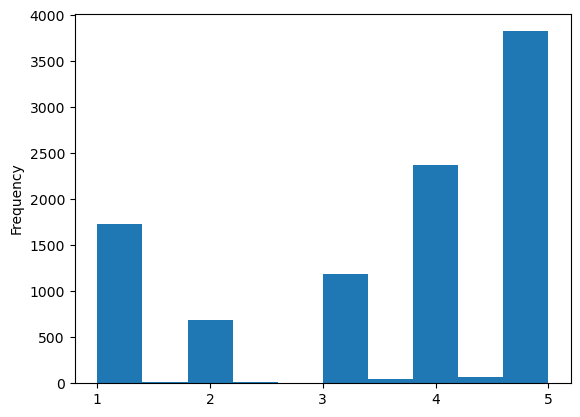

In [79]:
df["Rating"].plot(kind="hist", xticks=[1, 2, 3, 4, 5])

Но сейчас мы все замеряем по всем ресторанам в целом. Давайте сгруппируем по названию ресторана:

Можем собирать все в списки

In [83]:
df.groupby(by="Restaurant").agg(list).head(3)

,Reviewer,Review,Rating,Metadata,Time,Pictures,Pics_exist
Restaurant,,,,,,,
10 Downing Street,"[Smrati Saxena, Jayaprakash Reddy, Ram K, Shru...",[I've been to this place about two times and i...,"[3.0, 4.0, 4.0, 5.0, 4.0, 4.0, 1.0, 1.0, 1.0, ...","[18 Reviews , 41 Followers, 2 Reviews , 11 Fol...","[5/23/2019 21:04, 5/21/2019 16:00, 5/19/2019 1...","[0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 2, 0, 1, 0, ...","[False, False, False, False, False, True, Fals..."
13 Dhaba,"[Sarika, Ankur, Kumar Ajay, Henna Mittal, Yoge...",[I didn't go and eat at the Dhaba.\nI had orde...,"[4.0, 5.0, 5.0, 1.0, 5.0, 1.0, 1.0, 5.0, 3.0, ...","[34 Reviews , 12 Followers, 0 Reviews, 1 Revie...","[5/25/2019 15:05, 5/25/2019 13:03, 5/19/2019 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
"3B's - Buddies, Bar & Barbecue","[Kairamkonda Saikiran, Saiswapnil, Naveen, K P...",[We go their for a team dinner.The name of the...,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[1 Review , 3 Followers, 1 Review , 2 Follower...","[5/23/2019 23:39, 5/23/2019 23:21, 5/23/2019 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."


Можем сразу посчитать среднее. `numeric_only=True` позволяет избежать ситуации, когда пандас пытается считать среднее по списку строк и падает с ошибкой, закономерно не справившись с этой задачей

In [86]:
df.groupby(by="Restaurant").mean(numeric_only=True).head(3)

,Rating,Pictures,Pics_exist
Restaurant,,,
10 Downing Street,3.80,1.05,0.24
13 Dhaba,3.48,0.41,0.19
"3B's - Buddies, Bar & Barbecue",4.76,0.13,0.07


Можно заодно еще минимум, максимум и стандартное отклонение

In [89]:
df.groupby(by="Restaurant").agg({"Rating": ["mean", "min", "max", "std"]}).head(3)

Rating                    
                                 mean  min  max       std
Restaurant                                               
10 Downing Street                3.80  1.0  5.0  1.091751
13 Dhaba                         3.48  1.0  5.0  1.566570
3B's - Buddies, Bar & Barbecue   4.76  1.0  5.0  0.830237

Или задать разные способы агреггации для разных колонок

In [92]:
df.groupby("Restaurant").agg(
    {
        "Rating": lambda x: x.mean(),
        "Review": lambda x: list(x)
    }
).head(3)

,Rating,Review
Restaurant,,
10 Downing Street,3.80,[I've been to this place about two times and i...
13 Dhaba,3.48,[I didn't go and eat at the Dhaba.\nI had orde...
"3B's - Buddies, Bar & Barbecue",4.76,[We go their for a team dinner.The name of the...


А как отсортировать по среднему рейтингу?

In [95]:
df.groupby(by="Restaurant").mean(numeric_only=True).sort_values(by="Rating",
                                                                ascending=False)

,Rating,Pictures,Pics_exist
Restaurant,,,
AB's - Absolute Barbecues,4.880,0.24,0.07
B-Dubs,4.810,0.16,0.11
"3B's - Buddies, Bar & Barbecue",4.760,0.13,0.07
Paradise,4.700,0.02,0.02
Flechazo,4.660,0.55,0.14
...,...,...,...
Behrouz Biryani,2.825,0.36,0.23
Mathura Vilas,2.820,0.31,0.16
Pakwaan Grand,2.710,0.17,0.10
